# **DATA PREPARATION FOR TRAINING THE NEURAL NETWORK**

# **Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style='whitegrid', context='notebook')

# **Loading the Dataset**

In [13]:
FILE_NAME = 'Kochmesser_ohne_prozessdaten.xlsx'
FILE_PATH = '../data/' + FILE_NAME
SAVE_DIR = Path("../output/data_preparation_outputs")
SAVE_DIR.mkdir(parents=True, exist_ok=True)

dataframe = pd.read_excel(FILE_PATH)
dataset = dataframe.loc[:, 'Ra_ganz':'Ra3']
test_specimen_name = (dataframe['Name'].fillna('').astype(str).to_numpy(dtype='U'))
surface_roughness_ra = dataframe.loc[:,'Ra']

# **Feature and Target of the Dataset**

In [14]:
X = dataframe.loc[:, 'Ra_ganz':'DFT_Median_sobel_Bereich'].copy()
y = dataframe['Ra3'].copy()



*   **Feature preview**



In [15]:
print(f"Selected features: {X.shape[1]} columns\n")
print(X.tail(4))

Selected features: 42 columns

       Ra_ganz   Rq_ganz    Rz_ganz    Rt_ganz  Ra_Messlinienlange  \
8506  4.267380  5.309656  26.901961  31.764706            4.435460   
8507  4.320298  5.371672  29.019608  31.764706            4.434845   
8508  4.413511  5.401825  27.529412  31.372549            4.160347   
8509  4.282239  5.295432  27.450980  33.725490            4.332731   

      Rq_Messlinienlange  Rz_Messlinienlange  Rt_Messlinienlange  Ra_ohneRand  \
8506            5.412355           22.901961           30.196078     4.545781   
8507            5.449217           23.215686           29.411765     4.397257   
8508            5.081846           23.215686           26.666667     4.298405   
8509            5.374008           23.843137           28.235294     4.247794   

      Rq_ohneRand  ...  DFT_Median_ST_Linienbreite  DFT_Median_Max  \
8506     5.586906  ...                   30.541338             110   
8507     5.406206  ...                   81.196758             236   
85



*   **Target preview**



In [16]:
print("Imbalances in the Target\n")

target_count = y.value_counts()
total_train_example = np.sum(target_count)
classes = [1,0,2]
Ra3 = [target_count[0], target_count[1], target_count[2]]
imbalances = np.round(Ra3/total_train_example*100,2)
data = {
    "classes": classes,
    "Ra3-surface roughness [Ra3-unit]": Ra3,
    "Imbalances [%]": imbalances
}
imbalances_df = pd.DataFrame(data=data)

print(imbalances_df)

Imbalances in the Target

   classes  Ra3-surface roughness [Ra3-unit]  Imbalances [%]
0        1                              2810           33.02
1        0                              4480           52.64
2        2                              1220           14.34


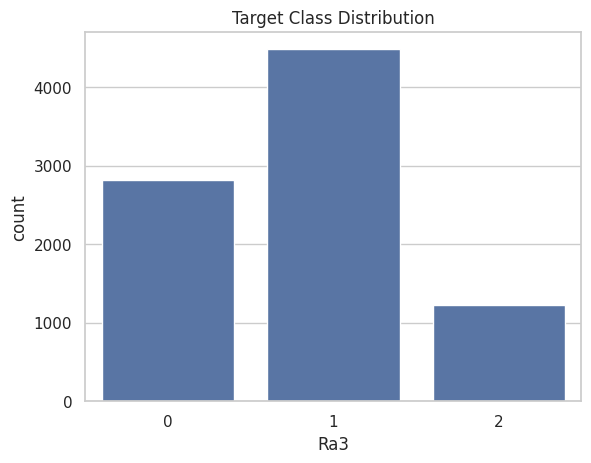

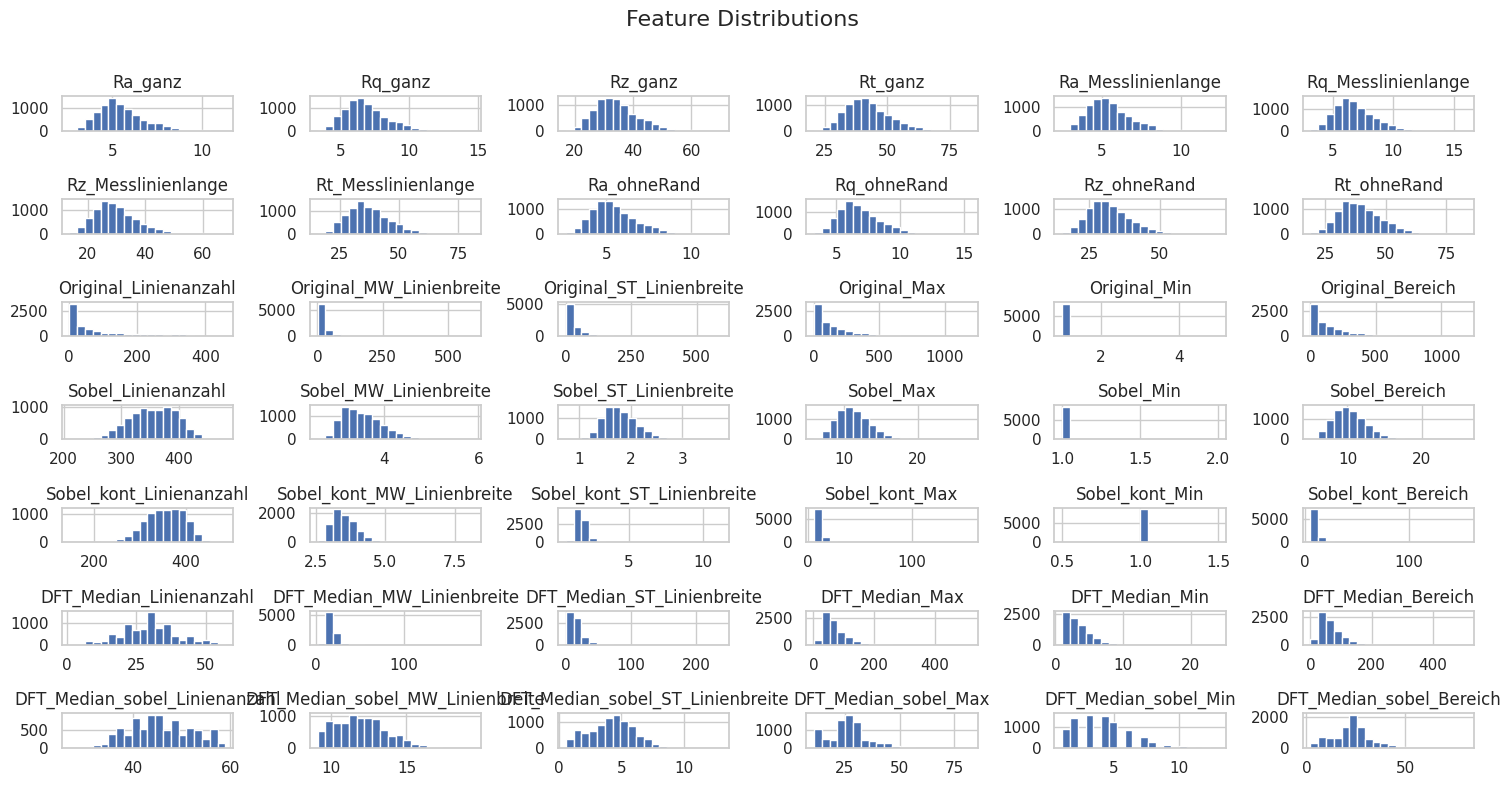

In [17]:
sns.countplot(x=y)
plt.title('Target Class Distribution')
plt.show()

# Feature distributions
X.hist(figsize=(15,8), bins=20)
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# **Check for missing value**

In [18]:
missing_features = X.isnull().sum()
missing_target = y.isnull().sum()
print("Missing values per feature:\n", len(missing_features[missing_features > 0]))
print("Missing values in target:", missing_target)

Missing values per feature:
 0
Missing values in target: 0


Since no missing value has been identified in the dataset, no further processing will be done here.

# Correlation Study

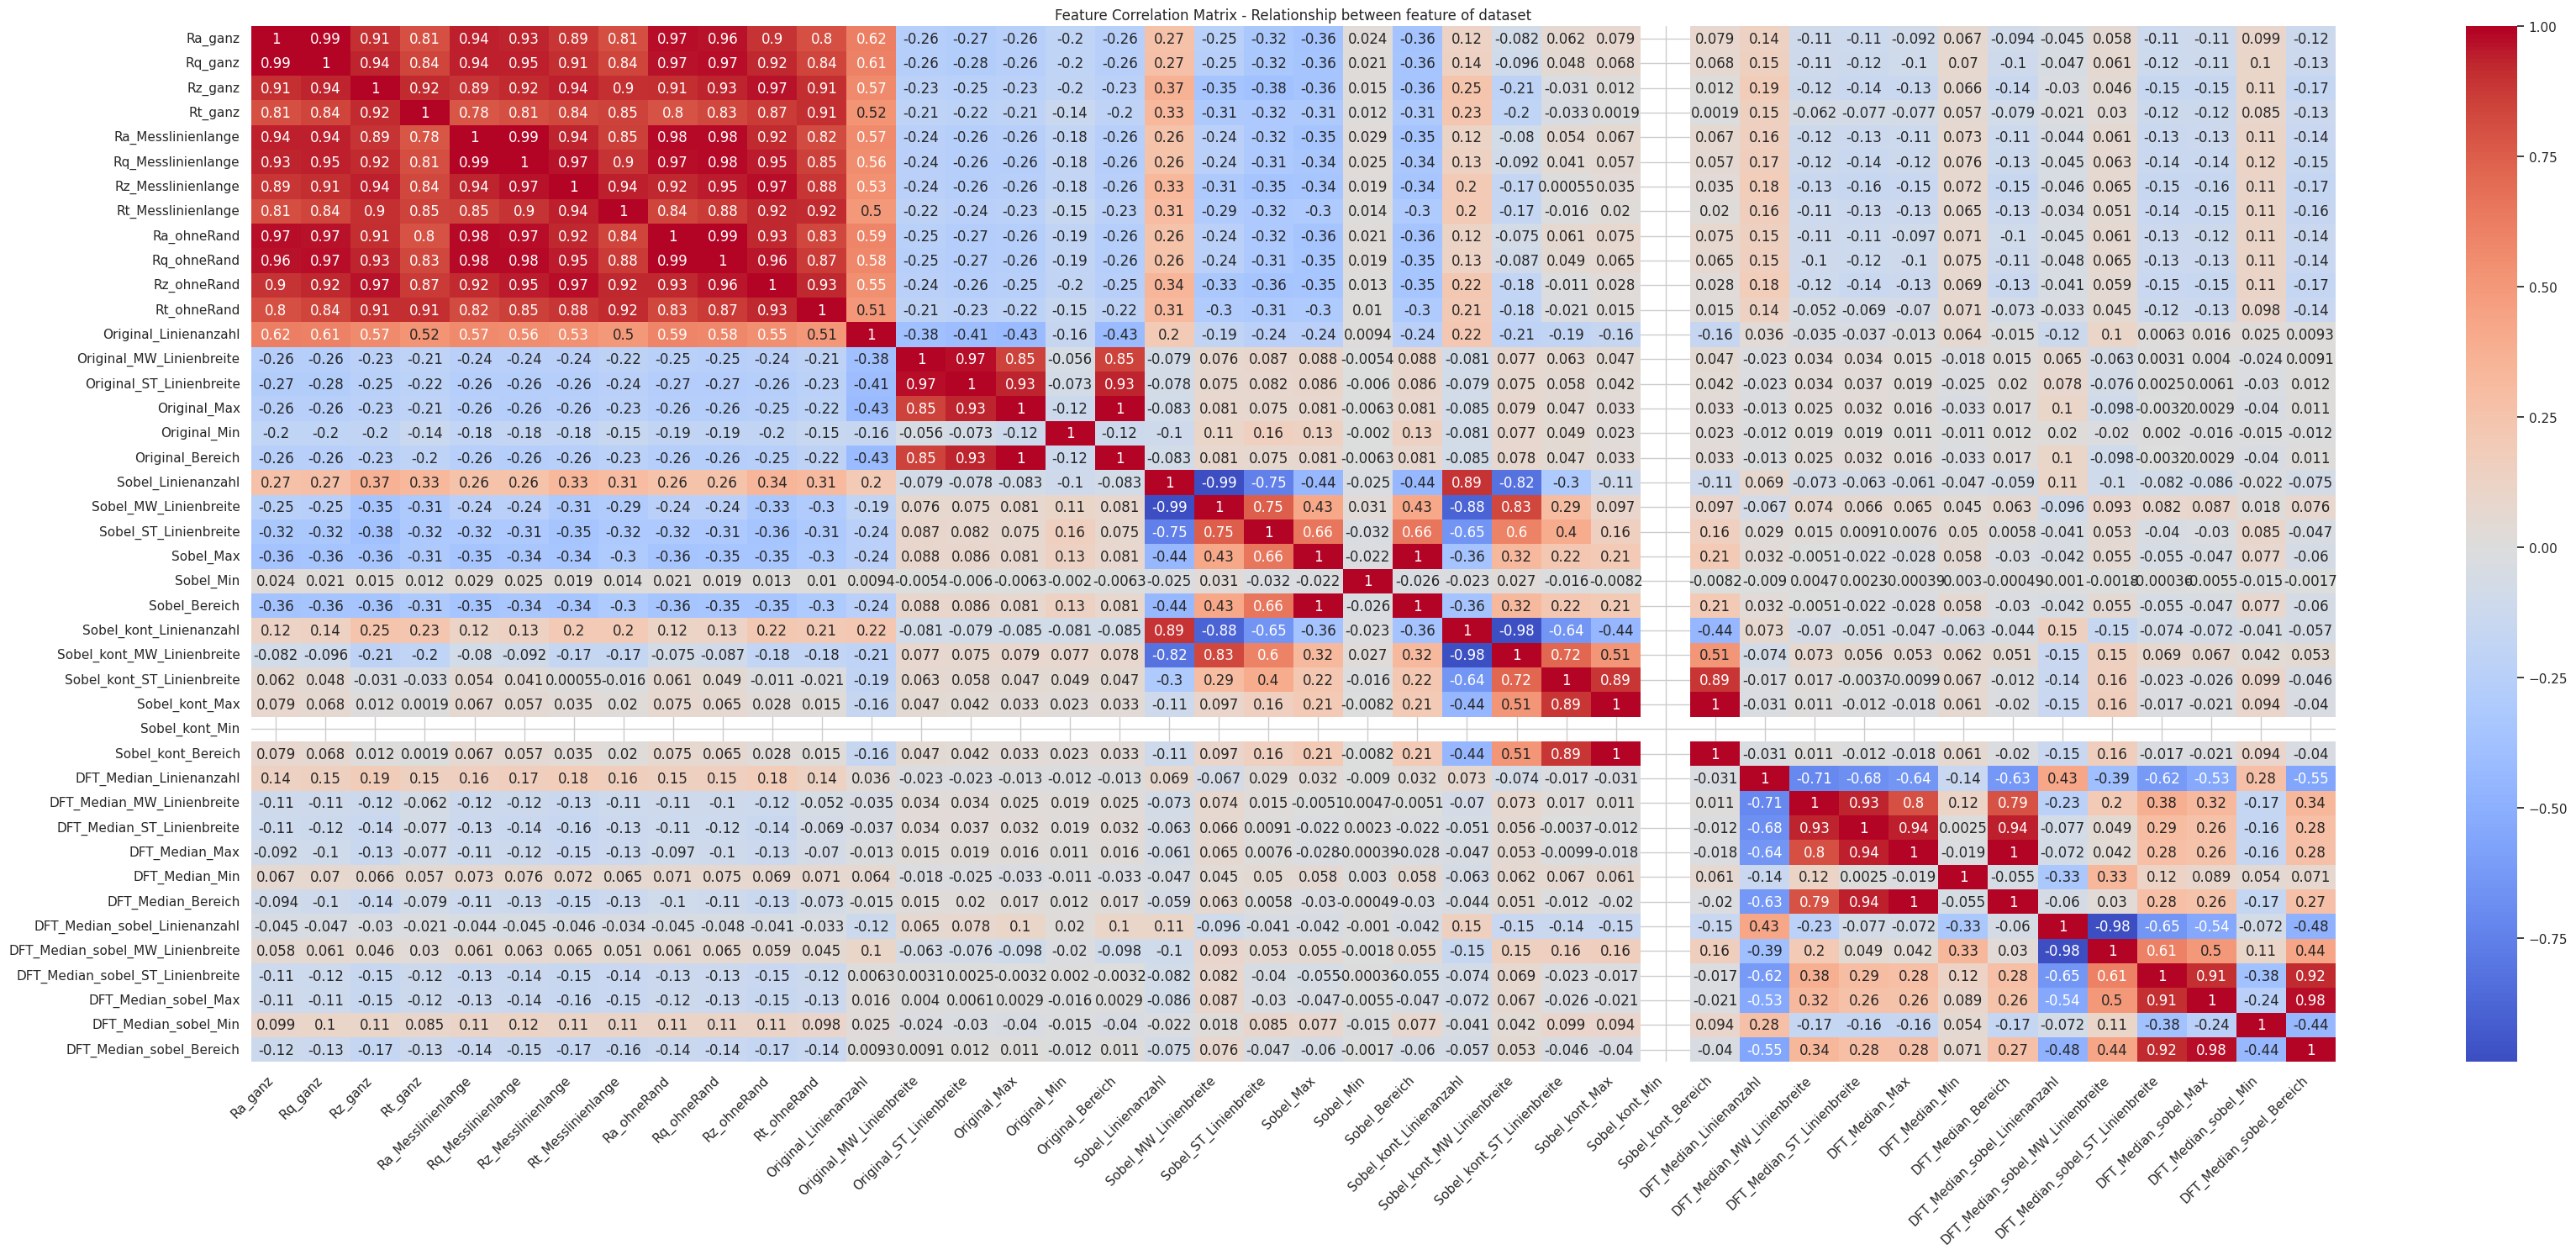

Correlation of each feature with target (Ra3):
 Ra_ganz                             0.458332
Original_Linienanzahl               0.441778
Ra_ohneRand                         0.440822
Rq_ganz                             0.439910
Ra_Messlinienlange                  0.423177
Rq_ohneRand                         0.422393
Rq_Messlinienlange                  0.404050
Rz_Messlinienlange                  0.357835
Rz_ohneRand                         0.354249
Rz_ganz                             0.344028
Rt_Messlinienlange                  0.328210
Rt_ohneRand                         0.323925
Rt_ganz                             0.317222
Sobel_kont_ST_Linienbreite          0.289668
Sobel_kont_Max                      0.276879
Sobel_kont_Bereich                  0.276879
Sobel_kont_MW_Linienbreite          0.218934
DFT_Median_sobel_MW_Linienbreite    0.209121
DFT_Median_Min                      0.098607
DFT_Median_sobel_ST_Linienbreite    0.081284
DFT_Median_sobel_Max                0.067660
DFT_Med

In [ ]:
plt.figure(figsize=(40,16))
sns.heatmap(X.corr(), cmap='coolwarm', center=0, annot=True)
plt.title('Feature Correlation Matrix - Relationship between feature of dataset')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Features vs target
cor_with_target = pd.concat([X, y], axis=1).corr()['Ra3'].drop('Ra3')
print("Correlation of each feature with target (Ra3):\n", cor_with_target.sort_values(ascending=False))


# **Outliers Identification**

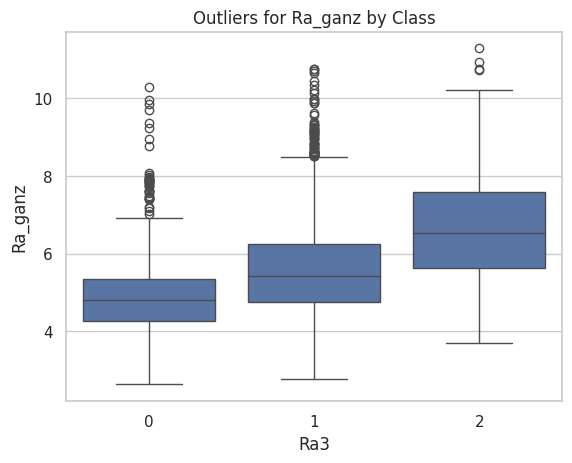

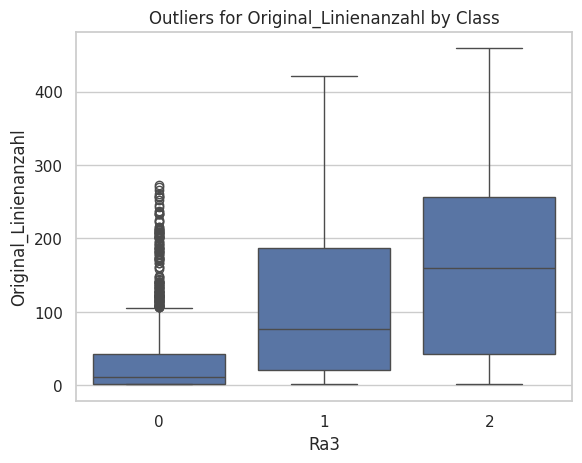

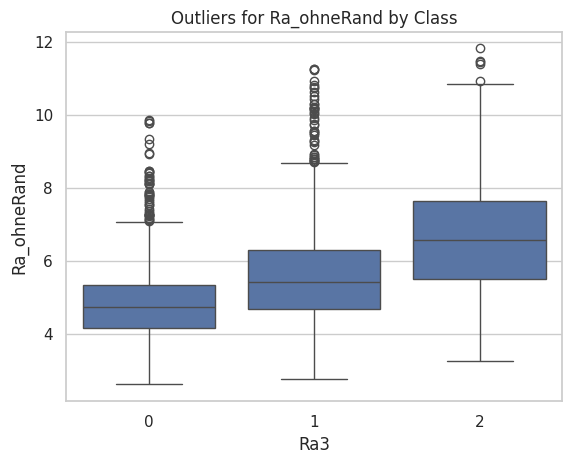

In [20]:
top_corr_feats = cor_with_target.abs().sort_values(ascending=False).head(3).index
for col in top_corr_feats:
    plt.figure()
    sns.boxplot(x=y, y=X[col])
    plt.title(f"Outliers for {col} by Class")
    plt.show()


# **Feature Scaling**

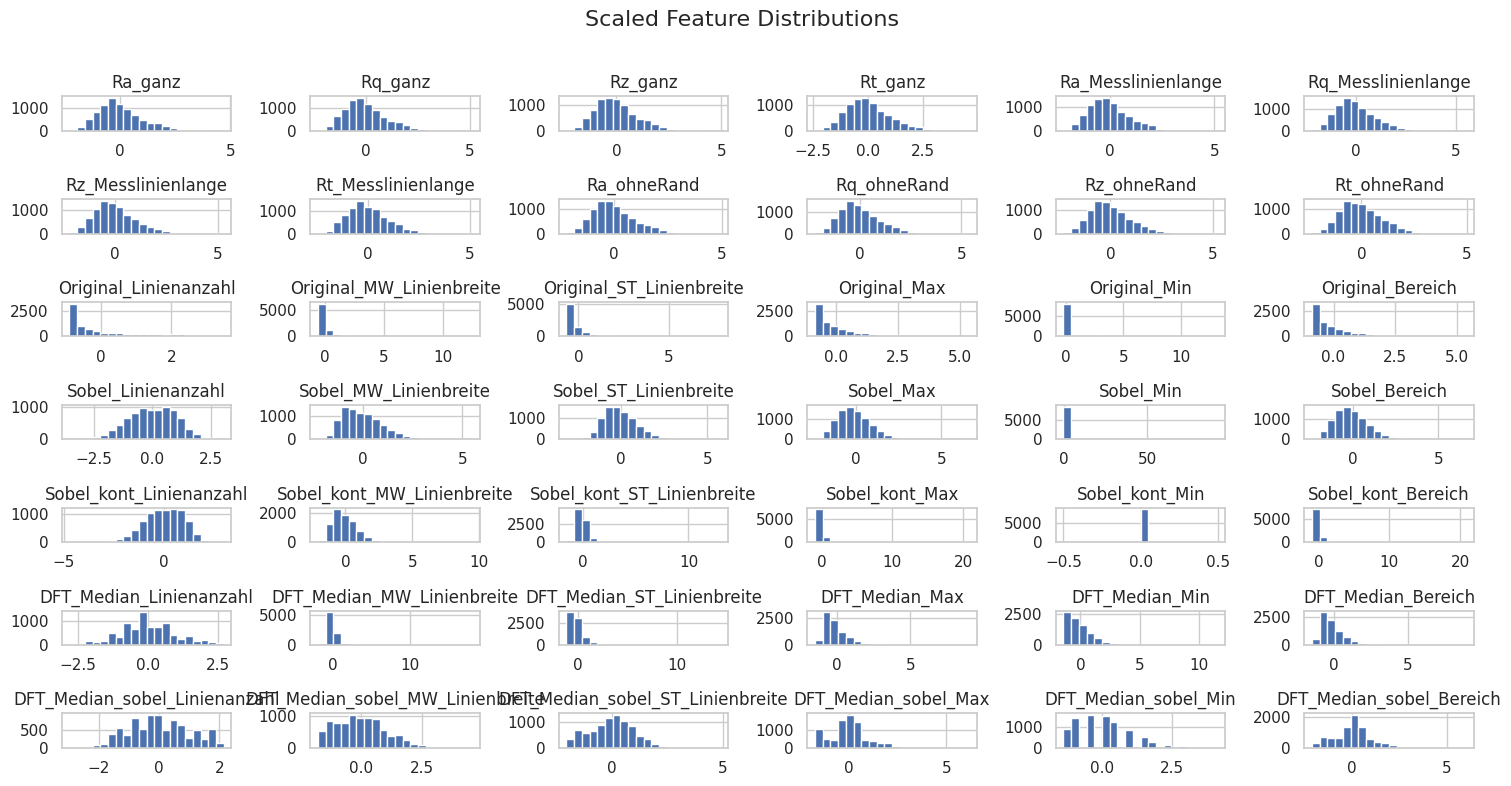

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled, columns=X.columns).hist(figsize=(15,8), bins=20)
plt.suptitle('Scaled Feature Distributions', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# **Export of Results for Training**

In [22]:
import joblib

np.save(SAVE_DIR / 'X.npy', X_scaled)
np.save(SAVE_DIR / 'y.npy', y.values)
np.save(SAVE_DIR / 'ra.npy', surface_roughness_ra.values)
np.save(SAVE_DIR / 'name.npy', test_specimen_name)
joblib.dump(scaler, SAVE_DIR / 'scaler.joblib')

['../output/data_preparation_outputs/scaler.joblib']